# Top Bank EDA / ML

- RowNumber: O número da coluna
- CustomerID: Identificador único do cliente
- Surname: Sobrenome do cliente.
- CreditScore: A pontuação de Crédito do cliente para o mercado de consumo.
- Geography: O país onde o cliente reside.
- Gender: O gênero do cliente.
- Age: A idade do cliente.
- Tenure: Número de anos que o cliente permaneceu ativo.
- Balance: Valor monetário que o cliente tem em sua conta bancária.
- NumOfProducts: O número de produtos comprado pelo cliente no banco.
- HasCrCard: Indica se o cliente possui ou não cartão de crédito.
- IsActiveMember: Indica se o cliente fez pelo menos uma movimentação na conta bancário dentro de 12 meses.
- EstimateSalary: Estimativa do salário mensal do cliente.
- Exited: Indica se o cliente está ou não em Churn.

### Preveja se os clientes podem se desligar no futuro do Top Bank

- ## Importando os pacotes necessários

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
pd.set_option('display.float_format','{:.2f}'.format)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

- ## Carregando os dados

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- ## Exploratory Data Analysis (EDA)

In [3]:
def infos(dfA, all = False, desc = 'Infos Data Frame'):
    print(desc)
    print(f'\nShape:\n{dfA.shape}')
    print(f'\nInfo:\n{dfA.info()}')
    print(f'\nIs Null: {dfA.isnull().sum().sum()}')
    print(f'{dfA.isnull().mean().sort_values(ascending = False)}')
    dup = dfA.duplicated()
    print(f'\nDuplicated: \n{dfA[dup].shape}\n')
    try:
        print(dfA[dfA.duplicated(keep = False)].sample(4))
    except:
        pass
    if all:
        print(f'\nDTypes - Numerics')
        print(dfA.describe(include = [np.number]))
        print(f'\nDTypes - Categoricals')
        print(dfA.describe(include = ['object']))
        
        print(f'\nHead:\n{dfA.head()}')
        print(f'\nSamples:\n{dfA.sample(2)}')
        print(f'\nTail:\n{dfA.tail()}')

infos(df)

Infos Data Frame

Shape:
(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Info:
None

Is Null: 0
RowNumber         0.00
CustomerId

- ## Exclusão de colunas desnecessárias

In [4]:
df = df.drop('RowNumber', axis = 1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- ## Resumo estatístico

In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


- O cálculo mostra que 20% dos clientes do Top Bank saem do banco, podemos agrupar os dados pelos recursos para explorar o principal motivo desta causa.

In [6]:
df.describe(include = ['O'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


- ## Colunas Categóricas e Númericas

In [7]:
def colCatNum(data):
    num = []
    cat = []
    for i in data.columns:
        if data[i].dtype == 'object':
            cat.append(i)
        else:
            num.append(i)
    return num, cat

num, cat = colCatNum(df)

print('Colunas numéricas: ', num,'\n')
print('Colunas categóricas: ', cat)

Colunas numéricas:  ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'] 

Colunas categóricas:  ['Surname', 'Geography', 'Gender']


- ## Vamos fazer uma análise com base em Exited, separando os dados nos que estão e os que não estão em CHURN.

In [8]:
exited = df.loc[df['Exited'] == 1]
exited['Exited'].value_counts()

1    2037
Name: Exited, dtype: int64

In [9]:
stayed = df.loc[df['Exited'] == 0]
stayed['Exited'].value_counts()

0    7963
Name: Exited, dtype: int64

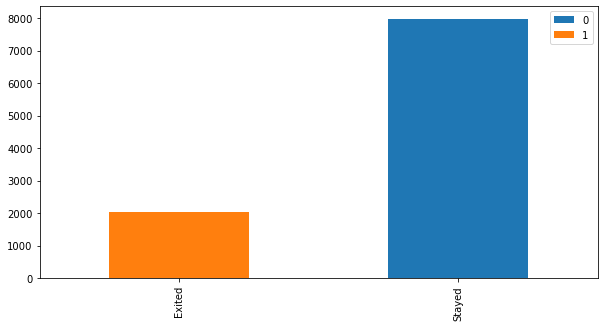

In [10]:
def churnBar(features):
    exited = df[df['Exited'] == 1][features].value_counts()
    stayed = df[df['Exited'] == 0][features].value_counts()
    dfChurnBar = pd.DataFrame([exited,stayed])
    dfChurnBar.index = ['Exited','Stayed']
    dfChurnBar.plot(kind = 'bar', stacked = True, figsize = (10,5))

churnBar('Exited')

In [11]:
df_credit = df
def createCredCat(x):
    if x <= 350:
        return 0
    elif x > 350 and x <= 450:
        return 1
    elif x > 450 and x <= 550:
        return 2
    elif x > 550 and x <= 650:
        return 3
    elif x > 650 and x <= 750:
        return 4
    else:
        return 5

df_credit['CredCat'] = df_credit['CreditScore'].apply(createCredCat)

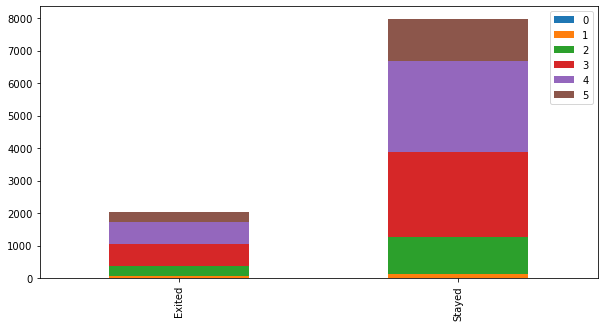

In [12]:
churnBar('CredCat')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CredCat
0,15634602,Hargrave,619,1,Female,42,2,0.00,1,1,1,101348.88,1,3
1,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0,3
2,15619304,Onio,502,1,Female,42,8,159660.80,3,1,0,113931.57,1,2
3,15701354,Boni,699,1,Female,39,1,0.00,2,0,0,93826.63,0,4
4,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0,5


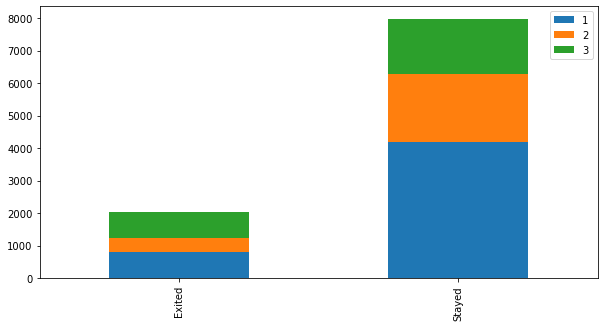

In [13]:
geoToNumber = {'France':1, 'Spain':2, 'Germany':3}
df['Geography'] = [geoToNumber[item] for item in df['Geography']]
churnBar('Geography')
df.head()

In [14]:
genderToNumber = {'Male':0, 'Female':1}
df['Gender'] = [genderToNumber[item] for item in df['Gender']]

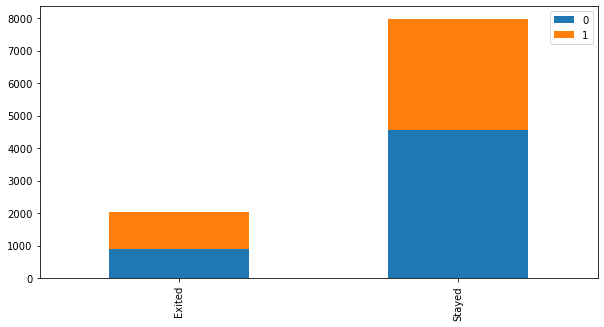

In [15]:
churnBar('Gender')

In [16]:
df_age = df
def createAgeCat(x):
    if x <= 20:
        return 0
    elif x > 20 and x <= 30:
        return 1
    elif x > 30 and x <= 40:
        return 2
    elif x > 40 and x <= 50:
        return 3
    elif x > 50 and x <= 60:
        return 4
    elif x > 60 and x <= 70:
        return 5
    else: 
        return 6
df_age['AgeCat'] = df_age['Age'].apply(createAgeCat)

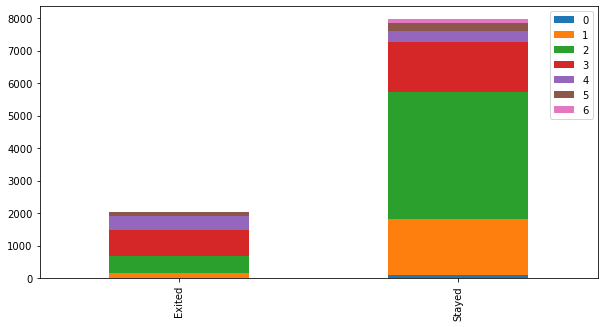

In [17]:
churnBar('AgeCat')

In [18]:
df_tenure = df
def createTenureCat(x):
    if x <= 3:
        return 0
    elif x > 3 and x <= 6:
        return 1
    elif x > 6 and x <= 9:
        return 2
    else:
        return 3
df_tenure['Tenure'] = df_tenure['Tenure'].apply(createTenureCat)

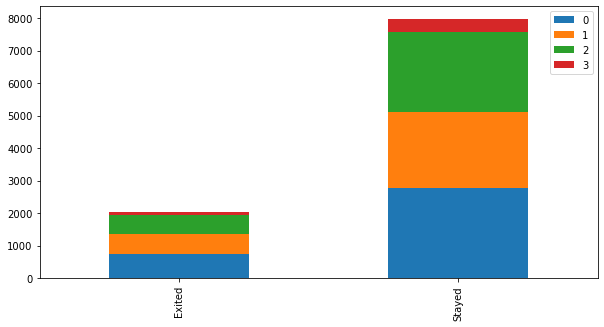

In [19]:
churnBar('Tenure')

In [20]:
df[['CustomerId','Balance']].sort_values('Balance',ascending=False).head(10)


,CustomerId,Balance
2092,15757408,250898.09
3280,15715622,238387.56
8733,15714241,222267.63
3588,15571958,221532.80
6717,15586674,216109.88
1067,15599131,214346.96
138,15594408,213146.20
1533,15769818,212778.20
3920,15620268,212696.32
2709,15780212,212692.97


In [21]:
df_Balance = df
def createBalanceCat(x):
    if x <= 50000:
        return 0
    elif x > 50000 and x <= 100000:
        return 1
    elif x > 100000 and x <= 150000:
        return 2
    elif x > 150000 and x <= 200000:
        return 3
    elif x > 200000 and x <= 250000:
        return 4
    else:
        return 5
df_Balance['BalanceCat'] = df_Balance['Balance'].apply(createBalanceCat)

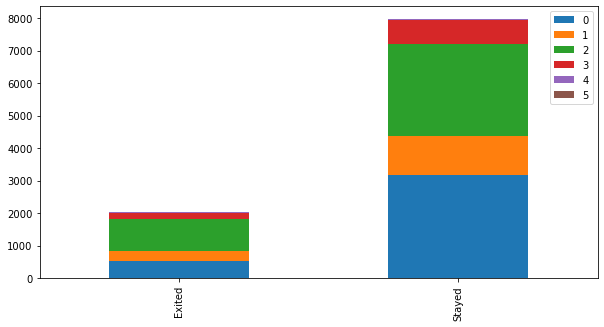

In [22]:
churnBar('BalanceCat')

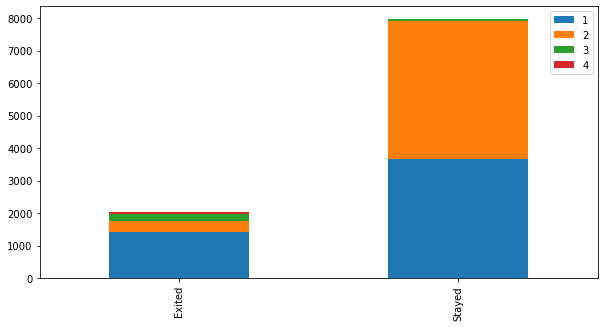

In [23]:
churnBar('NumOfProducts')

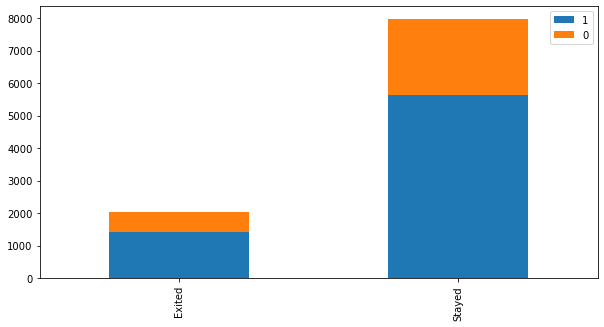

In [24]:
churnBar('HasCrCard')

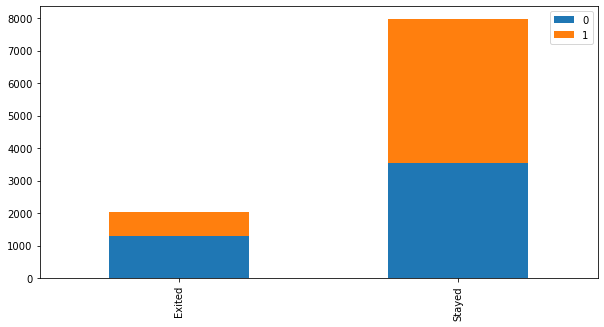

In [25]:
churnBar('IsActiveMember')

In [26]:
df_Salary = df
def createSalCat(x):
    if x <= 50000:
        return 0
    elif x > 50000 and x <= 100000:
        return 1
    elif x > 100000 and x <= 150000:
        return 2
    else: 
        return 3
df_Salary['SalCat'] = df_Salary['EstimatedSalary'].apply(createSalCat)



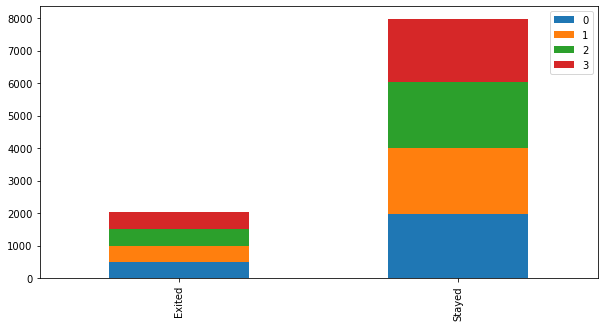

In [27]:
churnBar('SalCat')

- ## MODELING

In [28]:
df = df.drop(['CreditScore','Balance','EstimatedSalary','Surname','Age','CustomerId'], axis = 1)
df.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,CredCat,AgeCat,BalanceCat,SalCat
0,1,1,0,1,1,1,1,3,3,0,2
1,2,1,0,1,0,1,0,3,3,1,2
2,1,1,2,3,1,0,1,2,3,3,2
3,1,1,0,2,0,0,0,4,2,0,1
4,2,1,0,1,1,1,0,5,3,2,1


In [31]:
y = df['Exited']
X = df.drop(['Exited'], axis = 1)
X.shape, y.shape

((10000, 10), (10000,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,
                                                   random_state = 0)
X_train.shape, y_train.shape

((6000, 10), (6000,))

- ## K-Fold

In [37]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

- ## KNN

In [38]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv = k_fold, n_jobs = 1, 
                       scoring = scoring)
print(score)

[0.82       0.835      0.82       0.84       0.82833333 0.83333333
 0.85       0.80333333 0.82833333 0.81      ]


- KNN Score

In [39]:
round(np.mean(score) * 100, 2)

82.68

- ## Decision Tree

In [40]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv = k_fold, n_jobs = 1,
                       scoring = scoring)
print(score)

[0.77       0.805      0.78166667 0.78166667 0.79666667 0.775
 0.80333333 0.80166667 0.79       0.77      ]


- Decision Tree Score

In [41]:
round(np.mean(score) * 100, 2)

78.75

- ## Random Forest

In [42]:
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv = k_fold, n_jobs = 1,
                       scoring = scoring)
print(score)

[0.77333333 0.81       0.785      0.78666667 0.79166667 0.77833333
 0.79666667 0.80333333 0.79       0.76333333]


- Random Forest Score

In [43]:
round(np.mean(score) * 100, 2)

78.78

- ## Naive Bayes

In [44]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv = k_fold, n_jobs = 1,
                       scoring = scoring)
print(score)

[0.805      0.85166667 0.82333333 0.83166667 0.83       0.81166667
 0.84333333 0.83166667 0.81666667 0.81666667]


- Naive Bayes Score

In [45]:
round(np.mean(score) * 100, 2)

82.62

- ## SVM

In [46]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv = k_fold, n_jobs = 1,
                       scoring = scoring)
print(score)

[0.82666667 0.84833333 0.85333333 0.84833333 0.84166667 0.83666667
 0.85833333 0.83166667 0.83166667 0.83833333]


- SVM Score

In [47]:
round(np.mean(score) * 100, 2)

84.15

- O classificador SVM (SUpport Vector Machine) dá a melhor pontuação de 84,15. Vou usá-lo para testar o conjunto de dados de teste.

- ## Test

In [50]:
clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [51]:
print('%s: %.2f%%' % ('Accuracy: ', (clf.score(X_test, y_test)) * 100))

Accuracy: : 84.72%


- ## Conclusão

- Durante a análise exploratória dos dados, descobri que os clientes do sexo feminino são as mais propensas a abandono, os clientes que estão localizados na Alemanha são os mais rotulados e também os clientes que usam apenas um produto são os mais rotulados.

- Depois de construir vários modelos, terminei escolhendo o SVM onde teve o melhor desempenho do que os outros.